In [1]:
#zip 파일 압축 해제
import zipfile
import pandas as pd
import os

zip_path = '데이터 전처리 결과 월별.zip'
extract_path = '데이터 전처리 결과 월별'

with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(extract_path)
    
csv_files = sorted([f for f in os.listdir(extract_path) if f.endswith('.csv')])
print(csv_files)

C:\Users\chaey\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


['mainApr.csv', 'mainAug.csv', 'mainDec.csv', 'mainFeb.csv', 'mainJan.csv', 'mainJul.csv', 'mainJun.csv', 'mainMar.csv', 'mainMay.csv', 'mainNov.csv', 'mainOct.csv', 'mainSep.csv']


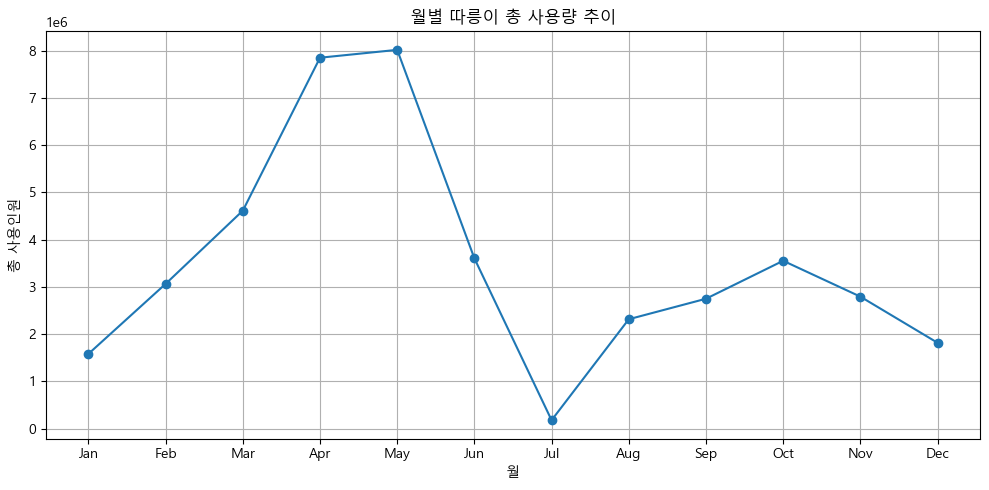

In [2]:
#월별 사용량 추이 그래프 코드
import matplotlib.pyplot as plt

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_total={}

for file in csv_files:
    df = pd.read_csv(os.path.join(extract_path, file), encoding='cp949')
    
    total_usage = df['총_사용인원'].sum()
    month = file.replace("main", "").replace(".csv", "")
    month_total[month] = total_usage
    
totals = [month_total[month] for month in month_order]

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(10, 5))
plt.plot(month_order, totals, marker='o')
plt.title('월별 따릉이 총 사용량 추이')
plt.xlabel('월')
plt.ylabel('총 사용인원')
plt.grid(True)
plt.tight_layout()
plt.show()
#1e6 백만명

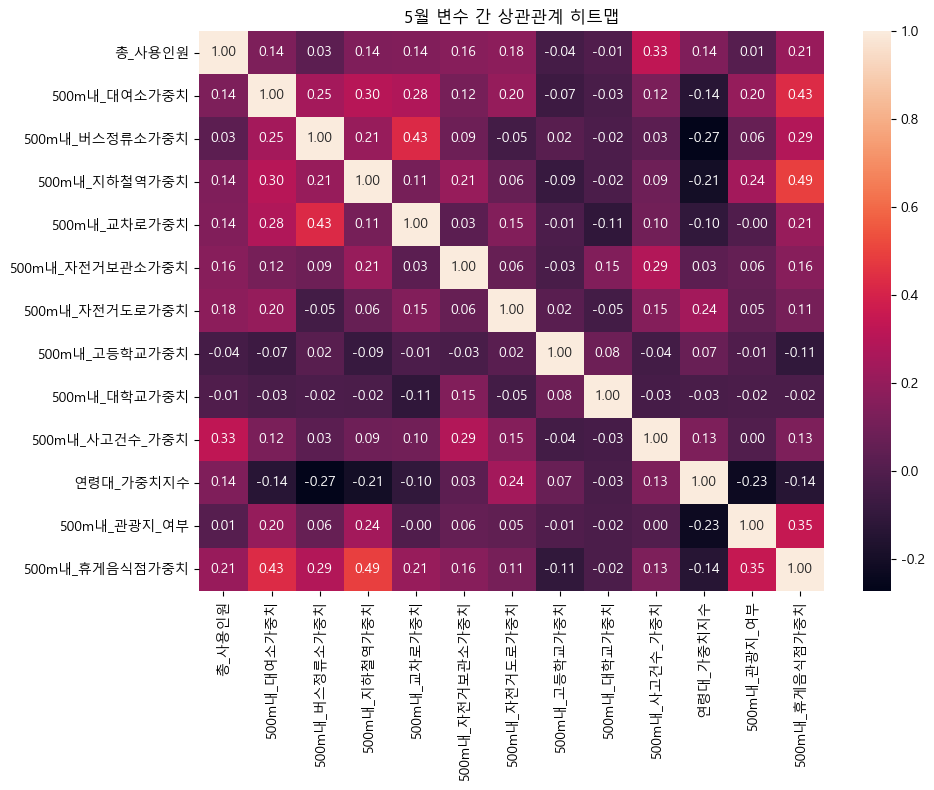

In [3]:
#변수 간 상관관계 히트맵 분석(5월)
import seaborn as sns
import matplotlib.pyplot as plt

filepath = os.path.join(extract_path, 'mainMay.csv')
df_may = pd.read_csv(filepath, encoding="cp949")
total_data = pd.read_csv('total_data.csv',encoding="cp949")

merge_cols=['대여소_ID', '500m내_관광지_여부', '동', '500m내_휴게음식점가중치']
total_data  = total_data[merge_cols]
merged_may = pd.merge(df_may, total_data, on='대여소_ID', how='left')

columns = ['총_사용인원','500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','연령대_가중치지수','500m내_관광지_여부', '500m내_휴게음식점가중치']

available_columns = [col for col in columns if col in merged_may.columns]
df_corr = merged_may[available_columns].dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f")
plt.title("5월 변수 간 상관관계 히트맵")
plt.tight_layout()
plt.show()

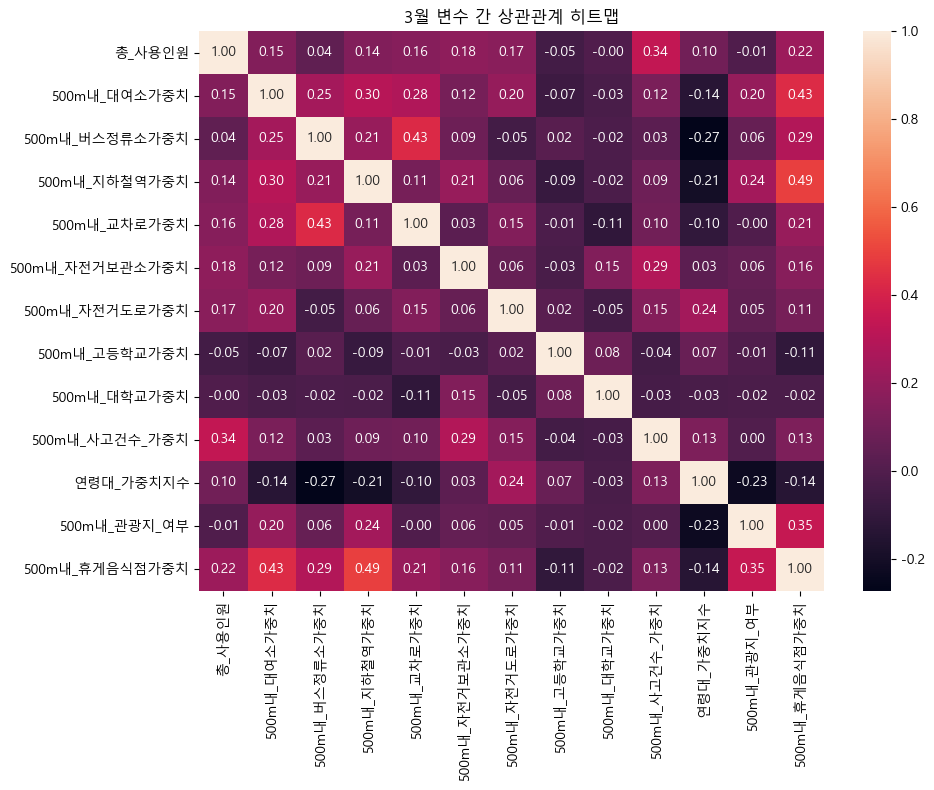

In [4]:
#변수 간 상관관계 히트맵 분석(3월)
import seaborn as sns
import matplotlib.pyplot as plt

filepath = os.path.join(extract_path, 'mainMar.csv')
df_mar = pd.read_csv(filepath, encoding="cp949")
total_data = pd.read_csv('total_data.csv',encoding="cp949")

merge_cols=['대여소_ID', '500m내_관광지_여부', '동', '500m내_휴게음식점가중치']
total_data  = total_data[merge_cols]
merged_mar = pd.merge(df_mar, total_data, on='대여소_ID', how='left')

columns = ['총_사용인원','500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','연령대_가중치지수','500m내_관광지_여부', '500m내_휴게음식점가중치']

available_columns = [col for col in columns if col in merged_mar.columns]
df_corr = merged_mar[available_columns].dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f")
plt.title("3월 변수 간 상관관계 히트맵")
plt.tight_layout()
plt.show()

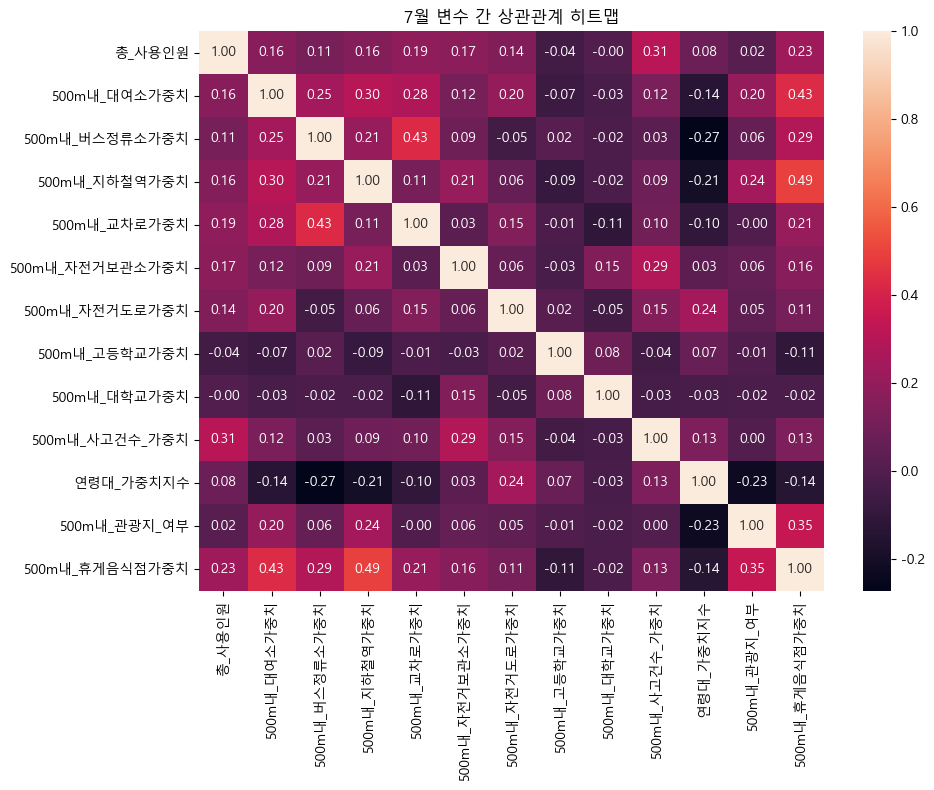

In [5]:
#변수 간 상관관계 히트맵 분석(7월)
import seaborn as sns
import matplotlib.pyplot as plt

filepath = os.path.join(extract_path, 'mainJul.csv')
df_jul = pd.read_csv(filepath, encoding="cp949")
total_data = pd.read_csv('total_data.csv',encoding="cp949")

merge_cols=['대여소_ID', '500m내_관광지_여부', '동', '500m내_휴게음식점가중치']
total_data  = total_data[merge_cols]
merged_jul = pd.merge(df_jul, total_data, on='대여소_ID', how='left')

columns = ['총_사용인원','500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','연령대_가중치지수','500m내_관광지_여부', '500m내_휴게음식점가중치']

available_columns = [col for col in columns if col in merged_jul.columns]
df_corr = merged_jul[available_columns].dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f")
plt.title("7월 변수 간 상관관계 히트맵")
plt.tight_layout()
plt.show()

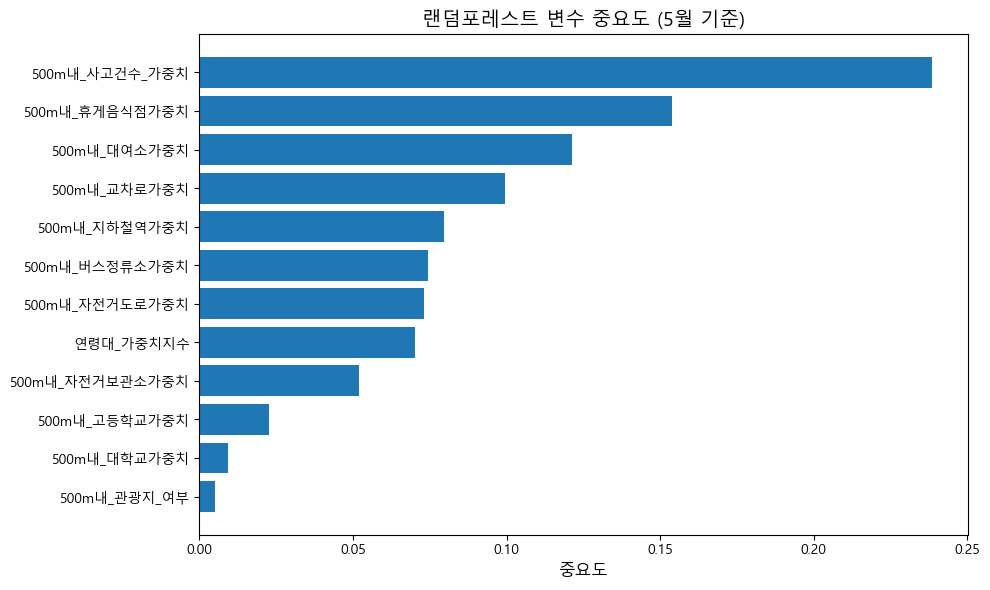

In [6]:
#변수 중요도 시각화 : 랜덤포레스트 기반
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


filepath = os.path.join(extract_path, 'mainMay.csv')
df_may = pd.read_csv(filepath, encoding="cp949")

total_data = pd.read_csv('total_data.csv', encoding='cp949')
merge_cols = ['대여소_ID', '500m내_관광지_여부', '동', '500m내_휴게음식점가중치']
df_merge = pd.merge(df_may, total_data[merge_cols], on='대여소_ID', how='left')

feature_cols = [
    '500m내_대여소가중치',
    '500m내_버스정류소가중치',
    '500m내_지하철역가중치',
    '500m내_교차로가중치',
    '500m내_자전거보관소가중치',
    '500m내_자전거도로가중치',
    '500m내_고등학교가중치',
    '500m내_대학교가중치',
    '500m내_사고건수_가중치',
    '연령대_가중치지수',
    '500m내_관광지_여부',
    '500m내_휴게음식점가중치'
]


X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)


importances = rf.feature_importances_
indices = importances.argsort()[::-1]
sorted_features = [feature_cols[i] for i in indices]


plt.figure(figsize=(10, 6))
plt.barh(sorted_features[::-1], importances[indices][::-1])
plt.title("랜덤포레스트 변수 중요도 (5월 기준)", fontsize=14)
plt.xlabel("중요도", fontsize=12)
plt.tight_layout()
plt.show()

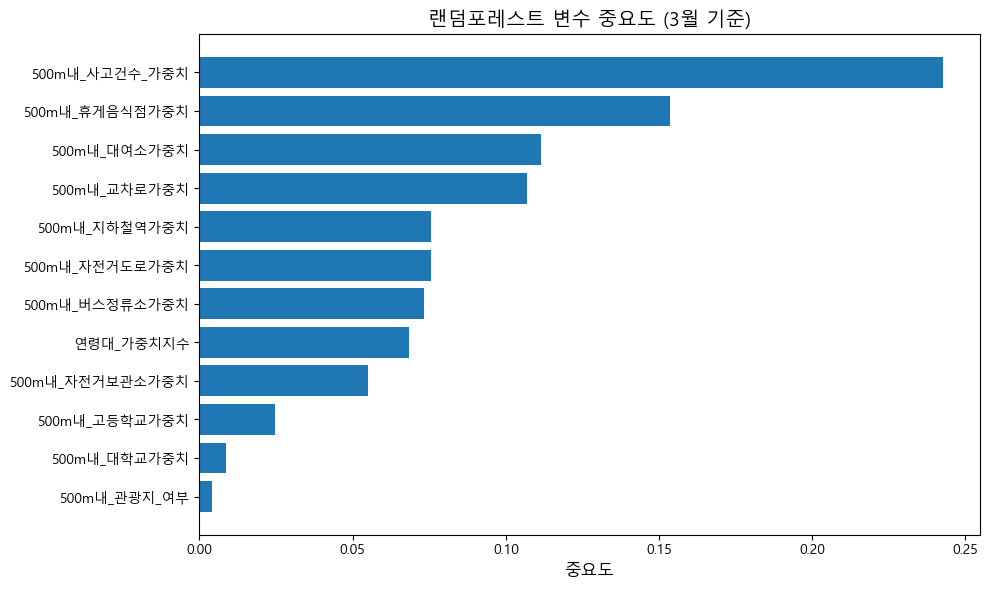

In [7]:
#변수 중요도 시각화 : 랜덤포레스트 기반
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


filepath = os.path.join(extract_path, 'mainMar.csv')
df_mar = pd.read_csv(filepath, encoding="cp949")

total_data = pd.read_csv('total_data.csv', encoding='cp949')
merge_cols = ['대여소_ID', '500m내_관광지_여부', '동', '500m내_휴게음식점가중치']
df_merge = pd.merge(df_mar, total_data[merge_cols], on='대여소_ID', how='left')


feature_cols = [
    '500m내_대여소가중치',
    '500m내_버스정류소가중치',
    '500m내_지하철역가중치',
    '500m내_교차로가중치',
    '500m내_자전거보관소가중치',
    '500m내_자전거도로가중치',
    '500m내_고등학교가중치',
    '500m내_대학교가중치',
    '500m내_사고건수_가중치',
    '연령대_가중치지수',
    '500m내_관광지_여부',
    '500m내_휴게음식점가중치'
]


X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)


importances = rf.feature_importances_
indices = importances.argsort()[::-1]
sorted_features = [feature_cols[i] for i in indices]


plt.figure(figsize=(10, 6))
plt.barh(sorted_features[::-1], importances[indices][::-1])
plt.title("랜덤포레스트 변수 중요도 (3월 기준)", fontsize=14)
plt.xlabel("중요도", fontsize=12)
plt.tight_layout()
plt.show()

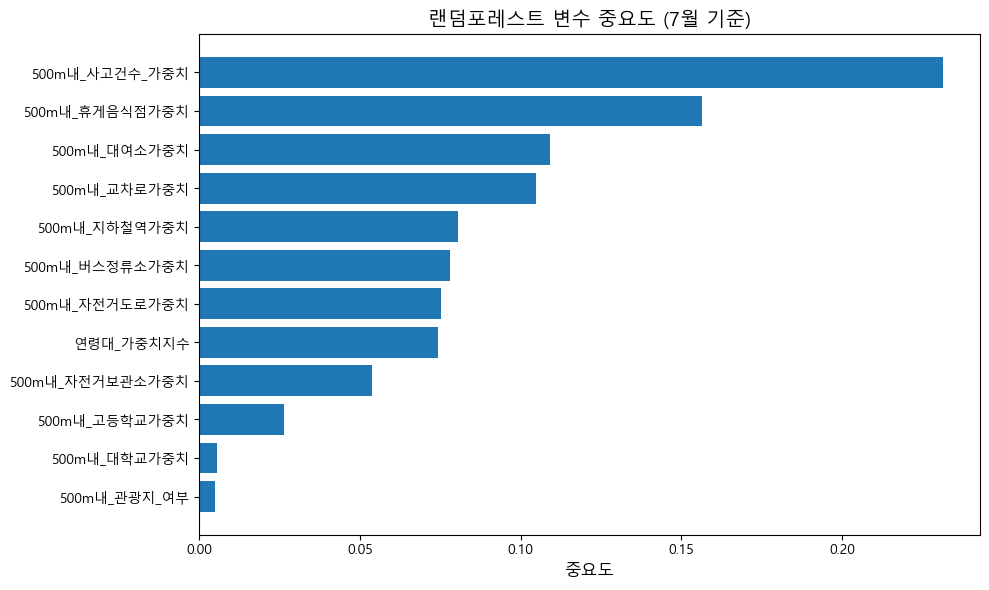

In [8]:
#변수 중요도 시각화 : 랜덤포레스트 기반
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


filepath = os.path.join(extract_path, 'mainJul.csv')
df_jul = pd.read_csv(filepath, encoding="cp949")

total_data = pd.read_csv('total_data.csv', encoding='cp949')
merge_cols = ['대여소_ID', '500m내_관광지_여부', '동', '500m내_휴게음식점가중치']
df_merge = pd.merge(df_jul, total_data[merge_cols], on='대여소_ID', how='left')

feature_cols = [
    '500m내_대여소가중치',
    '500m내_버스정류소가중치',
    '500m내_지하철역가중치',
    '500m내_교차로가중치',
    '500m내_자전거보관소가중치',
    '500m내_자전거도로가중치',
    '500m내_고등학교가중치',
    '500m내_대학교가중치',
    '500m내_사고건수_가중치',
    '연령대_가중치지수',
    '500m내_관광지_여부',
    '500m내_휴게음식점가중치'
]


X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)


importances = rf.feature_importances_
indices = importances.argsort()[::-1]
sorted_features = [feature_cols[i] for i in indices]


plt.figure(figsize=(10, 6))
plt.barh(sorted_features[::-1], importances[indices][::-1])
plt.title("랜덤포레스트 변수 중요도 (7월 기준)", fontsize=14)
plt.xlabel("중요도", fontsize=12)
plt.tight_layout()
plt.show()

In [22]:
#변수 중요도 기반 입지 평가 지표(5월)

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

filepath = os.path.join(extract_path, 'mainMay.csv')
df_may = pd.read_csv(filepath, encoding="cp949")

total_data = pd.read_csv('total_data.csv', encoding='cp949')
merge_cols = ['대여소_ID', '500m내_관광지_여부', '동', '500m내_휴게음식점가중치']
df_merge = pd.merge(df_may, total_data[merge_cols], on='대여소_ID', how='left')

feature_cols = [
    '500m내_대여소가중치',
    '500m내_버스정류소가중치',
    '500m내_지하철역가중치',
    '500m내_교차로가중치',
    '500m내_자전거보관소가중치',
    '500m내_자전거도로가중치',
    '500m내_고등학교가중치',
    '500m내_대학교가중치',
    '500m내_사고건수_가중치',
    '연령대_가중치지수',
    '500m내_관광지_여부',
    '500m내_휴게음식점가중치'
]


X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)

importances = rf.feature_importances_
importance_dict = dict(zip(feature_cols, importances))


df_merge['입지_스코어'] = X.apply(lambda row: sum(row[col] * importance_dict[col] for col in feature_cols), axis=1)


top_sites = df_merge[['대여소_ID', '입지_스코어', '평균_사용인원']].sort_values(by='입지_스코어', ascending=False)
print(top_sites.head(10))

       대여소_ID        입지_스코어      평균_사용인원
170    ST-840  22476.640189   329.666667
2683  ST-1584  22475.867637   491.000000
116    ST-891  22474.358632  1102.833333
2577  ST-1681  22471.219058   712.250000
2685  ST-1582  22470.764806   317.000000
3185  ST-1083  22469.979318   389.000000
1564  ST-2596  22469.770098   248.000000
494    ST-547  22469.445202   496.500000
2676  ST-1590  22469.382501   254.416667
2872  ST-1409  22469.119361   227.500000


In [23]:
top_sites.to_csv('5월_입지스코어_상위10.csv', index=False, encoding='utf-8-sig')

In [24]:
#상위 10개 대여소 위치를 지도에 시각화(5월)
import pandas as pd

filepath = os.path.join(extract_path, 'mainMay.csv')
df_may = pd.read_csv(filepath, encoding='cp949')

top_ids = ['ST-840', 'ST-1584', 'ST-891', 'ST-1681', 'ST-1582',
           'ST-1083', 'ST-2596', 'ST-547', 'ST-1590', 'ST-1409']

locations = df_merge[df_merge['대여소_ID'].isin(top_ids)][['대여소_ID', '위도', '경도']]

score_df = pd.DataFrame({
    '대여소_ID': top_ids,
    '입지_스코어': [22476.640189, 22475.867637, 22474.358632, 22471.219058, 22470.764806,
                    22469.979318, 22469.770098, 22469.445202, 22469.382501, 22469.119361],
    '평균_사용인원': [ 329.666667, 491.0, 1102.833333, 712.25, 317.0, 389.0, 248.0, 496.5, 254.416667, 227.5]
})


merged_df = pd.merge(score_df, locations, on='대여소_ID')


merged_df.to_csv('5월_입지스코어_상위10_위치포함.csv', index=False, encoding='utf-8-sig')

In [25]:
#Folium 코드
import folium
top10_may = pd.read_csv('5월_입지스코어_상위10_위치포함.csv')

map_center = [top10_may['위도'].mean(), top10_may['경도'].mean()]
m = folium.Map(location=map_center, zoom_start=14)

for idx, row in top10_may.iterrows():
    popup_text = f"ID: {row['대여소_ID']}<br>입지스코어: {row['입지_스코어']:.2f}<br>평균 사용인원: {row['평균_사용인원']:.2f}"
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='bicycle', prefix='fa')
    ).add_to(m)

m.save('5월_입지스코어_상위10_지도.html')

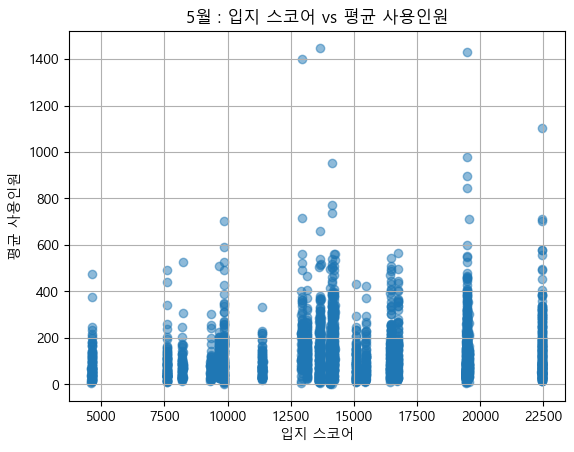

In [26]:
import matplotlib.pyplot as plt

plt.scatter(df_merge['입지_스코어'], df_merge['평균_사용인원'], alpha=0.5)
plt.title('5월 : 입지 스코어 vs 평균 사용인원')
plt.xlabel('입지 스코어')
plt.ylabel('평균 사용인원')
plt.grid(True)
plt.show()

In [27]:
#변수 중요도 기반 입지 평가 지표(3월)

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

filepath = os.path.join(extract_path, 'mainMar.csv')
df_mar = pd.read_csv(filepath, encoding="cp949")

total_data = pd.read_csv('total_data.csv', encoding='cp949')
merge_cols = ['대여소_ID', '500m내_관광지_여부', '동', '500m내_휴게음식점가중치']
df_merge = pd.merge(df_mar, total_data[merge_cols], on='대여소_ID', how='left')

feature_cols = [
    '500m내_대여소가중치',
    '500m내_버스정류소가중치',
    '500m내_지하철역가중치',
    '500m내_교차로가중치',
    '500m내_자전거보관소가중치',
    '500m내_자전거도로가중치',
    '500m내_고등학교가중치',
    '500m내_대학교가중치',
    '500m내_사고건수_가중치',
    '연령대_가중치지수',
    '500m내_관광지_여부',
    '500m내_휴게음식점가중치'
]


X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)

importances = rf.feature_importances_
importance_dict = dict(zip(feature_cols, importances))


df_merge['입지_스코어'] = X.apply(lambda row: sum(row[col] * importance_dict[col] for col in feature_cols), axis=1)


top_sites = df_merge[['대여소_ID', '입지_스코어', '평균_사용인원']].sort_values(by='입지_스코어', ascending=False)
print(top_sites.head(10))

       대여소_ID        입지_스코어     평균_사용인원
170    ST-840  21943.913107  183.090909
2683  ST-1584  21943.140583  267.363636
116    ST-891  21941.593645  609.454545
2577  ST-1681  21938.576862  439.545455
2685  ST-1582  21938.121601  172.900000
3185  ST-1083  21937.354614  240.818182
1564  ST-2596  21937.006666  172.909091
494    ST-547  21936.773428  269.363636
2676  ST-1590  21936.672708  139.200000
2872  ST-1409  21936.493939  146.000000


In [28]:
top_sites.to_csv('3월_입지스코어_상위10.csv', index=False, encoding='utf-8-sig')

In [29]:
#상위 10개 대여소 위치를 지도에 시각화(3월)
filepath_mar = os.path.join(extract_path, 'mainMar.csv')
df_mar = pd.read_csv(filepath_mar, encoding='cp949')

top_ids = ['ST-840', 'ST-1584', 'ST-891', 'ST-1681', 'ST-1582',
               'ST-1083', 'ST-2596', 'ST-547', 'ST-1590', 'ST-1409']

locations = df_merge[df_merge['대여소_ID'].isin(top_ids)][['대여소_ID', '위도', '경도']]

score_df = pd.DataFrame({
    '대여소_ID': top_ids,
    '입지_스코어': [
        21943.913107, 21943.140583, 21941.593645, 21938.576862, 21938.121601,
        21937.354614, 21937.006666, 21936.773428, 21936.672708, 21936.493939
    ],
    '평균_사용인원': [
        183.090909, 267.363636, 609.454545, 439.545455, 172.900000,
        240.818182, 172.909091, 269.363636, 139.200000, 146.000000
    ]
})

merged_df = pd.merge(score_df, locations, on='대여소_ID')
merged_df.to_csv('3월_입지스코어_상위10_위치포함.csv', index=False, encoding='utf-8-sig')

In [55]:
!pip install folium

     -------------------------------------- 112.5/112.5 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 90.4/90.4 kB 5.0 MB/s eta 0:00:00


In [30]:
#Folium 코드
import folium
top10_march = pd.read_csv('3월_입지스코어_상위10_위치포함.csv')

map_center = [top10_march['위도'].mean(), top10_march['경도'].mean()]
m = folium.Map(location=map_center, zoom_start=14)

for idx, row in top10_march.iterrows():
    popup_text = f"ID: {row['대여소_ID']}<br>입지스코어: {row['입지_스코어']:.2f}<br>평균 사용인원: {row['평균_사용인원']:.2f}"
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='bicycle', prefix='fa')
    ).add_to(m)

m.save('3월_입지스코어_상위10_지도.html')

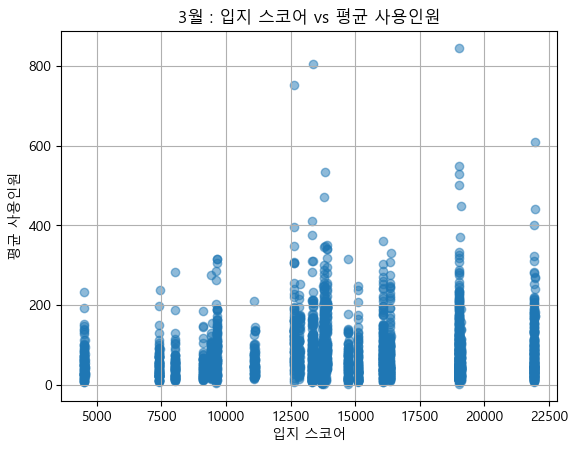

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df_merge['입지_스코어'], df_merge['평균_사용인원'], alpha=0.5)
plt.title('3월 : 입지 스코어 vs 평균 사용인원')
plt.xlabel('입지 스코어')
plt.ylabel('평균 사용인원')
plt.grid(True)
plt.show()

In [32]:
#변수 중요도 기반 입지 평가 지표(7월)

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

filepath = os.path.join(extract_path, 'mainJul.csv')
df_jul = pd.read_csv(filepath, encoding="cp949")

total_data = pd.read_csv('total_data.csv', encoding='cp949')
merge_cols = ['대여소_ID', '500m내_관광지_여부', '동', '500m내_휴게음식점가중치']
df_merge = pd.merge(df_jul, total_data[merge_cols], on='대여소_ID', how='left')

feature_cols = [
    '500m내_대여소가중치',
    '500m내_버스정류소가중치',
    '500m내_지하철역가중치',
    '500m내_교차로가중치',
    '500m내_자전거보관소가중치',
    '500m내_자전거도로가중치',
    '500m내_고등학교가중치',
    '500m내_대학교가중치',
    '500m내_사고건수_가중치',
    '연령대_가중치지수',
    '500m내_관광지_여부',
    '500m내_휴게음식점가중치'
]


X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)

importances = rf.feature_importances_
importance_dict = dict(zip(feature_cols, importances))


df_merge['입지_스코어'] = X.apply(lambda row: sum(row[col] * importance_dict[col] for col in feature_cols), axis=1)


top_sites = df_merge[['대여소_ID', '입지_스코어', '평균_사용인원']].sort_values(by='입지_스코어', ascending=False)
print(top_sites.head(10))

       대여소_ID        입지_스코어  평균_사용인원
170    ST-840  23836.633986    142.0
2683  ST-1584  23835.847563    207.0
116    ST-891  23834.365516    529.0
2577  ST-1681  23830.992177    310.0
2685  ST-1582  23830.514563    159.0
1564  ST-2596  23829.811614    135.0
3185  ST-1083  23829.781056    197.0
2676  ST-1590  23829.241463    130.0
494    ST-547  23829.229075    202.0
2372  ST-1868  23828.850826     79.0


In [33]:
top_sites.to_csv('7월_입지스코어_상위10.csv', index=False, encoding='utf-8-sig')

In [34]:
#상위 10개 대여소 위치를 지도에 시각화(7월)
filepath_jul = os.path.join(extract_path, 'mainJul.csv')
df_jul = pd.read_csv(filepath_jul, encoding='cp949')

top_ids = ['ST-840', 'ST-1584', 'ST-891', 'ST-1681', 'ST-1582',
               'ST-2596', 'ST-1083', 'ST-1590', 'ST-547', 'ST-1868']

locations = df_merge[df_merge['대여소_ID'].isin(top_ids)][['대여소_ID', '위도', '경도']]

score_df = pd.DataFrame({
    '대여소_ID': top_ids,
    '입지_스코어': [
        23836.633986, 23835.847563, 23834.365516, 23830.992177, 23830.514563,
        23829.811614, 23829.781056, 23829.241463, 23829.229075, 23828.850826
    ],
    '평균_사용인원': [
       142.0, 207.0, 529.0, 310.0, 159.0,
        135.0, 197.0, 130.0, 202.0, 79.0
    ]
})

merged_df = pd.merge(score_df, locations, on='대여소_ID')
merged_df.to_csv('7월_입지스코어_상위10_위치포함.csv', index=False, encoding='utf-8-sig')

In [35]:
#Folium 코드
import folium
top10_july = pd.read_csv('7월_입지스코어_상위10_위치포함.csv')

map_center = [top10_july['위도'].mean(), top10_july['경도'].mean()]
m = folium.Map(location=map_center, zoom_start=14)

for idx, row in top10_july.iterrows():
    popup_text = f"ID: {row['대여소_ID']}<br>입지스코어: {row['입지_스코어']:.2f}<br>평균 사용인원: {row['평균_사용인원']:.2f}"
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='bicycle', prefix='fa')
    ).add_to(m)

m.save('7월_입지스코어_상위10_지도.html')

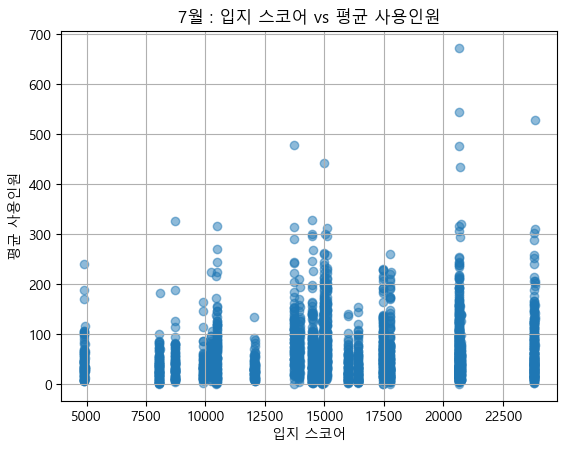

In [37]:
import matplotlib.pyplot as plt

plt.scatter(df_merge['입지_스코어'], df_merge['평균_사용인원'], alpha=0.5)
plt.title('7월 : 입지 스코어 vs 평균 사용인원')
plt.xlabel('입지 스코어')
plt.ylabel('평균 사용인원')
plt.grid(True)
plt.show()

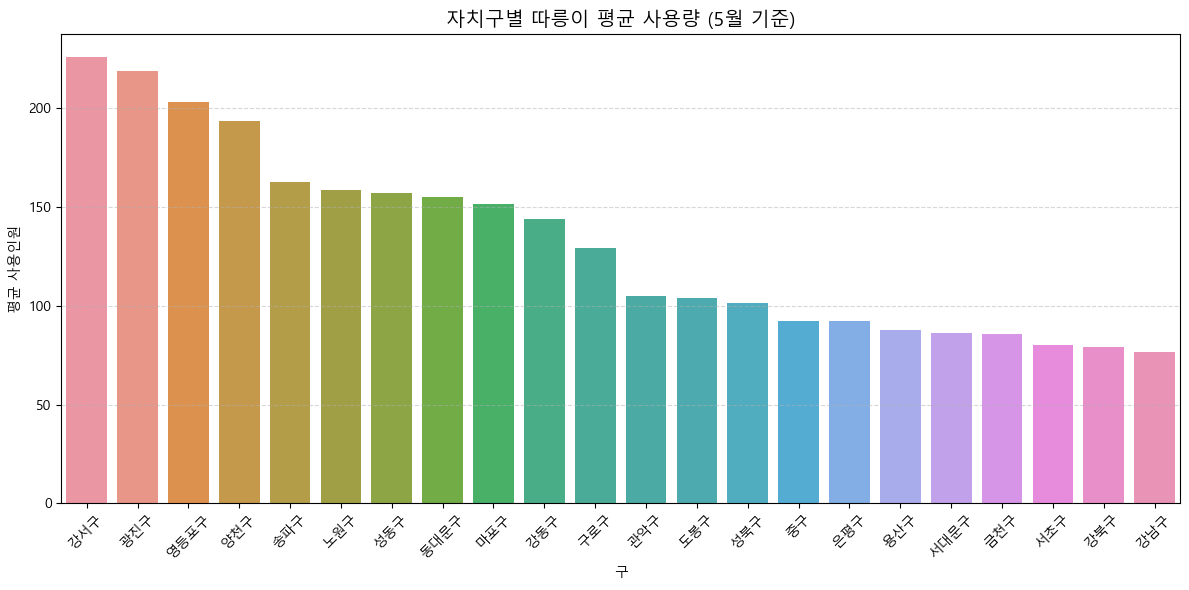

In [67]:
#자치구별 평균 사용량 막대그래프(5월)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

filepath = os.path.join(extract_path, 'mainMay.csv')
df_may = pd.read_csv(filepath, encoding='cp949')

df_may = df_may.dropna(subset=['구', '평균_사용인원'])

df_may = df_may[df_may['구'] != '분당구']

gu_avg = df_may.groupby('구')['평균_사용인원'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gu_avg.index, y=gu_avg.values)
plt.title('자치구별 따릉이 평균 사용량 (5월 기준)', fontsize=14)
plt.ylabel('평균 사용인원')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

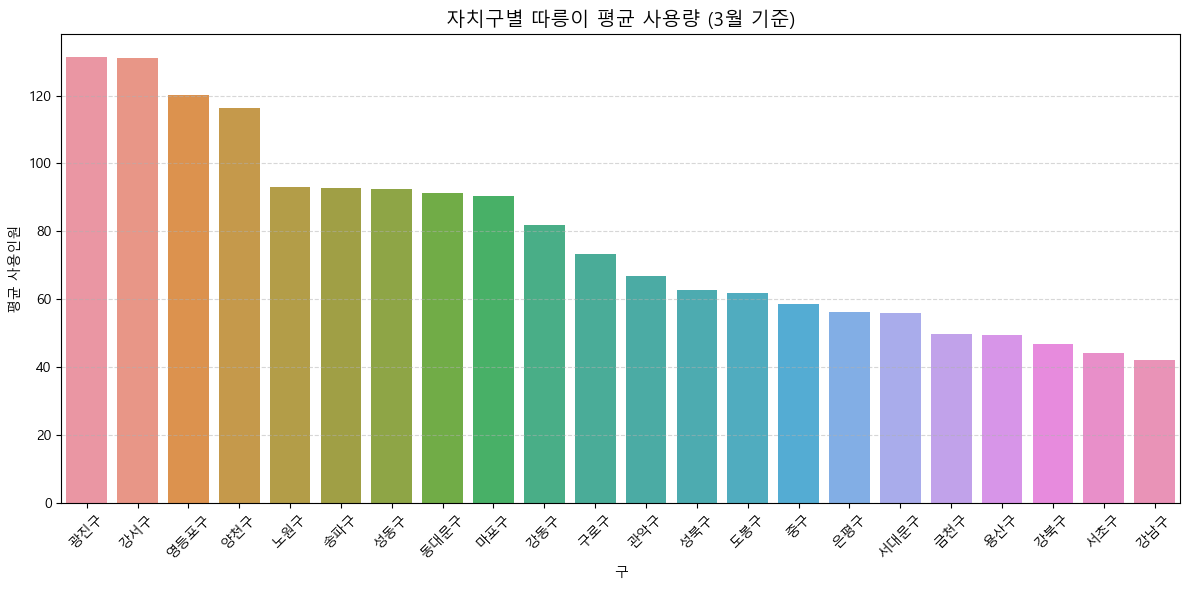

In [68]:
#자치구별 평균 사용량 막대그래프(3월)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

filepath = os.path.join(extract_path, 'mainMar.csv')
df_mar = pd.read_csv(filepath, encoding='cp949')

df_mar = df_mar.dropna(subset=['구', '평균_사용인원'])

df_mar = df_mar[df_mar['구'] != '분당구']

gu_avg = df_mar.groupby('구')['평균_사용인원'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gu_avg.index, y=gu_avg.values)
plt.title('자치구별 따릉이 평균 사용량 (3월 기준)', fontsize=14)
plt.ylabel('평균 사용인원')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

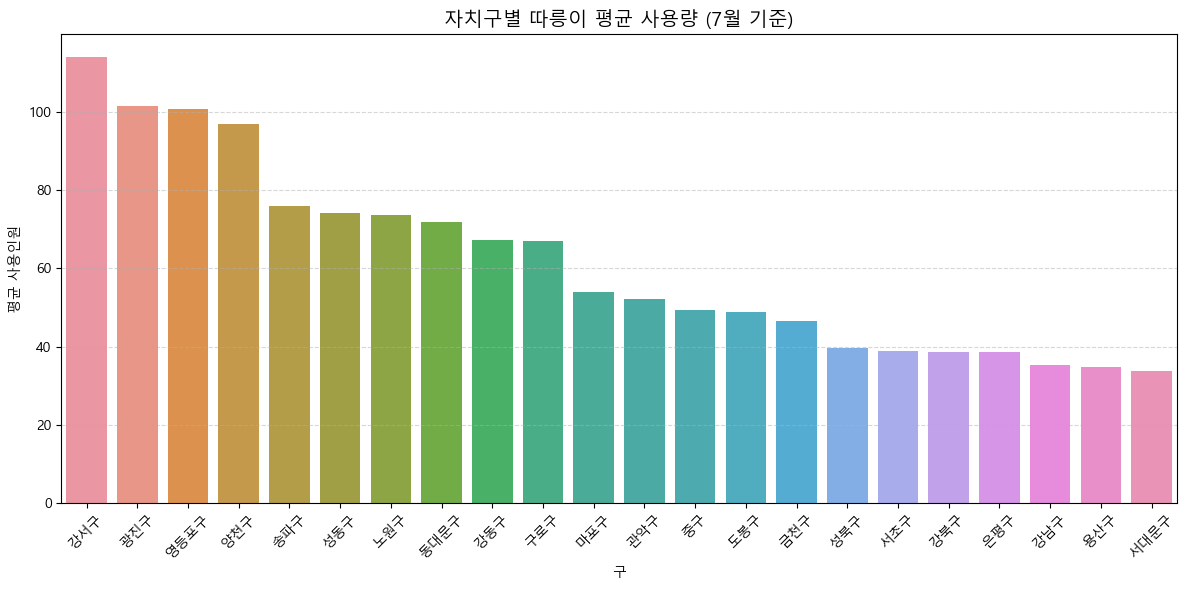

In [69]:
#자치구별 평균 사용량 막대그래프(7월)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

filepath = os.path.join(extract_path, 'mainJul.csv')
df_jul = pd.read_csv(filepath, encoding='cp949')

df_jul = df_jul.dropna(subset=['구', '평균_사용인원'])

df_jul = df_jul[df_jul['구'] != '분당구']

gu_avg = df_jul.groupby('구')['평균_사용인원'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gu_avg.index, y=gu_avg.values)
plt.title('자치구별 따릉이 평균 사용량 (7월 기준)', fontsize=14)
plt.ylabel('평균 사용인원')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()